In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import os

In [7]:
# Set plotting style
sns.set(style="whitegrid")

In [8]:
# Load data from Excel
file_path = r"D:\personal\bdas.spyberpolymath.com\project\data\Sales_Forecasting.xlsx"
df = pd.read_excel(file_path)

In [9]:
# Inspect data
print(df.head())
print(df.info())

                     Date Region Product  Sales
0 1970-01-01 05:30:45.658   East       C    674
1 1970-01-01 05:30:45.659   West       B    963
2 1970-01-01 05:30:45.660  North       B    842
3 1970-01-01 05:30:45.661   East       D    340
4 1970-01-01 05:30:45.662   East       B    663
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     100 non-null    datetime64[ns]
 1   Region   100 non-null    object        
 2   Product  100 non-null    object        
 3   Sales    100 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.3+ KB
None


In [10]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

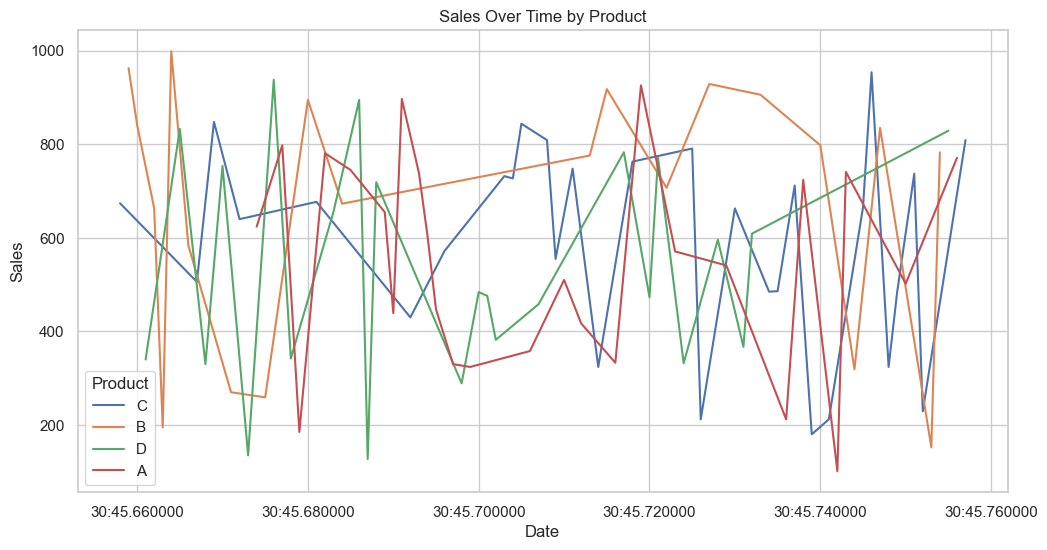

In [11]:
# Basic EDA
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Sales', hue='Product')
plt.title("Sales Over Time by Product")
plt.show()

In [12]:
# Aggregate sales per product (optional)
product_sales = df.groupby(['Date', 'Product'])['Sales'].sum().reset_index()

In [13]:
# Prepare data for Prophet (example: forecasting Product B)
df_b = product_sales[product_sales['Product']=='B'][['Date','Sales']]
df_b = df_b.rename(columns={'Date':'ds','Sales':'y'})

In [14]:
# Initialize Prophet model
model = Prophet()
model.fit(df_b)

18:11:05 - cmdstanpy - INFO - Chain [1] start processing
18:11:08 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
# Forecast for next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

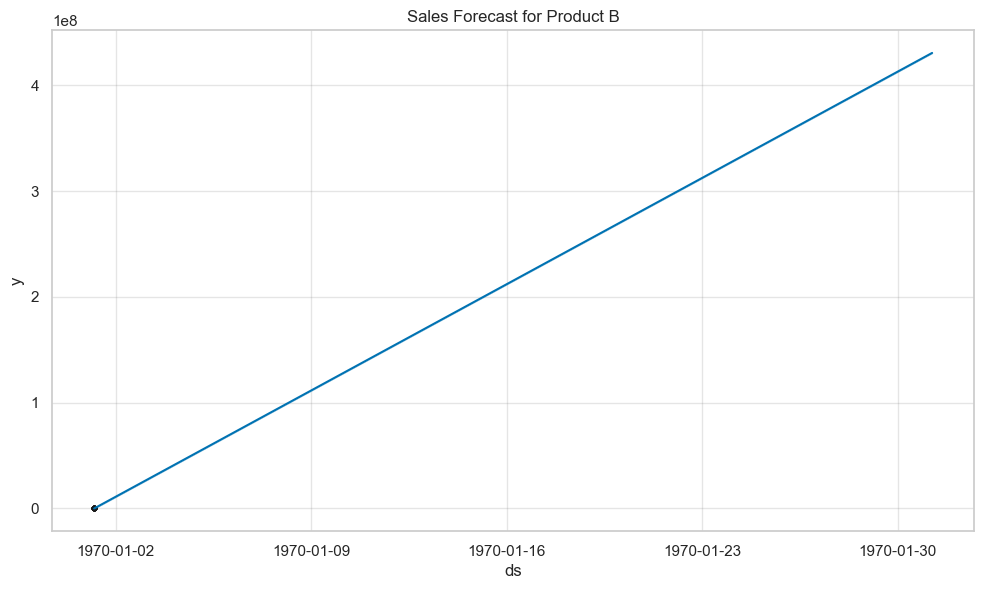

In [16]:
# Plot forecast
fig = model.plot(forecast)
plt.title("Sales Forecast for Product B")
plt.show()

In [17]:
# Save forecast to Excel
output_dir = r"D:\personal\bdas.spyberpolymath.com\project\data_output"
os.makedirs(output_dir, exist_ok=True)
forecast.to_excel(os.path.join(output_dir, 'Forecast_Results.xlsx'), index=False)

In [18]:
print("Forecast saved successfully!")

Forecast saved successfully!
